[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0]
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0]
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0]
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0]


<ipython-input-2-7992ce292fee>:43: RuntimeWarning: divide by zero encountered in log
  J = - y * np.log(h) - (1 - y) * np.log(1 - h)
<ipython-input-2-7992ce292fee>:43: RuntimeWarning: invalid value encountered in double_scalars
  J = - y * np.log(h) - (1 - y) * np.log(1 - h)
<ipython-input-2-7992ce292fee>:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Validation Accuracy: 73.04%


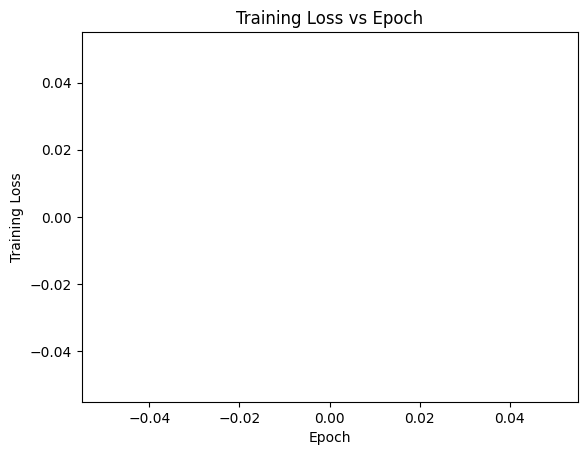

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt


# Load the diabetes dataset into a 2D Python list
data_path = 'diabetes.csv'
data = genfromtxt(data_path, delimiter=',')
diabetes_data = data.tolist()
for i in range(5):
  print(diabetes_data[i])
type(diabetes_data)

# Randomly split the dataset into Training (70%), Validation (15%) and Test (15%) set
np.random.shuffle(diabetes_data)
n_samples = len(diabetes_data)
train_set = diabetes_data[:int(0.7*n_samples)]
val_set = diabetes_data[int(0.7*n_samples):int(0.85*n_samples)]
test_set = diabetes_data[int(0.85*n_samples):]

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Concatenate 1 to each sample in the training set and initialize 𝚹 randomly
n_features = len(train_set[0]) - 1
train_set_X = np.array([sample[:-1] for sample in train_set])
train_set_X = np.concatenate([train_set_X, np.ones((train_set_X.shape[0], 1))], axis=1)
theta = np.random.rand(n_features + 1)

# Train the logistic regression model
max_iter = 500
lr = 0.01
N_train = len(train_set_X)
history = []
for itr in range(max_iter):
    TJ = 0
    for i in range(N_train):
        x = train_set_X[i]
        y = train_set[i][-1]
        z = np.dot(x, theta)
        h = sigmoid(z)
        J = - y * np.log(h) - (1 - y) * np.log(1 - h)
        TJ += J
        dv = np.dot(x, (h - y))
        theta = theta - lr * dv
    TJ = TJ / N_train
    history.append(TJ)

# Compute the accuracy on the validation set
N_val = len(val_set)
correct = 0
for i in range(N_val):
    x = val_set[i][:-1]
    y = val_set[i][-1]
    z = np.dot(np.concatenate([x, [1]]), theta)
    h = sigmoid(z)
    if h >= 0.5:
        pred_label = 1
    else:
        pred_label = 0
    if pred_label == y:
        correct += 1
val_acc = correct * 100 / N_val
print("Validation Accuracy: {:.2f}%".format(val_acc))

# Plot the training loss vs epoch
plt.plot(range(1, max_iter+1), history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.show()
